# Imports, Read in data

In [29]:
from collections import Counter
import plotly.express as pxn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sb # data visualization library  
import random
import plotly.graph_objects as go
from wordcloud import WordCloud,STOPWORDS
%matplotlib inline
# Allows full width row text in column
pd.set_option('display.max_colwidth', -1)

<ipython-input-29-cf12ae8fce29>:12: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [30]:
data = pd.read_csv('/Users/rashidbaset/Code/twitter-sentiment-prediction/_data/raw-data/Tweets.csv')

# Termonology


| Category                       | Definition                                                       |
| ------------------------------ | ---------------------------------------------------------------- |
| 'tweet_id'                     |            |
| 'airline_sentiment'            | Negative/neutral/positive Airline sentiment confidence sentiment of tweet (target variable)                             |
| 'airline_sentiment_confidence' | Confidence with which the given sentiment was determined         |
| 'negativereason'               | Reason for which user posted a negative tweet                    |
| 'negativereason_confidence'    | Confidence with which the negative reason of tweet was predicted |
| 'airline'                      | Airline for which the tweet was posted                           |
| 'airline_sentiment_gold'       |                                                                  |
| 'name'                         | Name of the person who tweeted                                   |
| 'negativereason_gold'          |                                                                  |
| 'retweet_count'                | Number of retweets                                               |
| 'text'                         | Text of the tweet whose sentiment has to be predicted            |
| 'tweet_coord'                  |                                                                  |
| 'tweet_created'                | Time at which the tweet was created                              |
| 'tweet_location'               | Location from where the tweet was posted                         |
| 'user_timezone'                |                                                                  |
|                                |                                                                  |


The categories i'm paying attention to are: 
- 'airline_sentiment' 
- 'negativereason' 
- 'airline' 
- 'text'
- 'tweet_created'
- 'tweet_location'
- 'user_timezone'  

# Variable type table 

| Quantitative: | Continuous                                                                   | Discrete |
| ------------- | ---------------------------------------------------------------------------- | -------- |
|               | 'airline_sentiment_confidence', 'negativereason_confidence', 'retweet_count' |    'tweet_created'      |
|               |                                                                              |          |

| Categorical: | Ordinal                                                        | Nominal                    |
| ------------ | -------------------------------------------------------------- | -------------------------- |
|              | 'arline_sentiment', 'negativereason', 'airline_sentiment_gold' | 'airline', 'user_timezone' |
|              |                                                                |                            |



# Train split

In [31]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(data,test_size=0.3)

df = train

# df.info() & value_counts()

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10248 entries, 345 to 9284
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      10248 non-null  int64  
 1   airline_sentiment             10248 non-null  object 
 2   airline_sentiment_confidence  10248 non-null  float64
 3   negativereason                6440 non-null   object 
 4   negativereason_confidence     7371 non-null   float64
 5   airline                       10248 non-null  object 
 6   airline_sentiment_gold        26 non-null     object 
 7   name                          10248 non-null  object 
 8   negativereason_gold           23 non-null     object 
 9   retweet_count                 10248 non-null  int64  
 10  text                          10248 non-null  object 
 11  tweet_coord                   713 non-null    object 
 12  tweet_created                 10248 non-null  object 
 13  

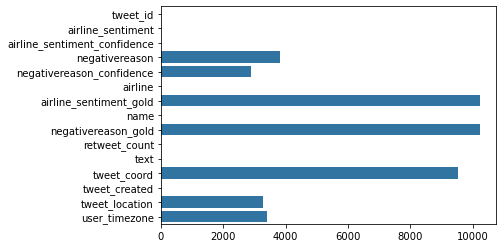

In [33]:
# Missing Data

df.isna().sum()
na_counts = df.isna().sum()
base_color = sb.color_palette()[0]
sb.barplot(na_counts, na_counts.index.values, color=base_color)

In [34]:
## Cols to Remove?
### Dropping cols
df.drop(columns=['tweet_coord', 'negativereason_gold', 'airline_sentiment_gold'], axis=1, inplace=True)

/Users/rashidbaset/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
### Date type conversion
df['tweet_created'] = df['tweet_created'].astype('datetime64[ns]')

<ipython-input-35-8a48f0141564>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tweet_created'] = df['tweet_created'].astype('datetime64[ns]')


In [37]:
df.to_csv("/Users/rashidbaset/Code/twitter-sentiment-prediction/_data/processed/airline_sentiment_cleaned.csv")

## Airlines

In [36]:
df.airline.value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America    504 
Name: airline, dtype: int64

### Differences in cofidence for airline sentiment and negative reason

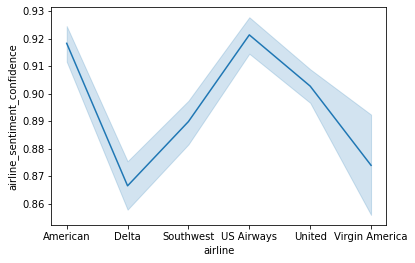

In [26]:
sb.lineplot(data=df, x="airline", y="airline_sentiment_confidence")

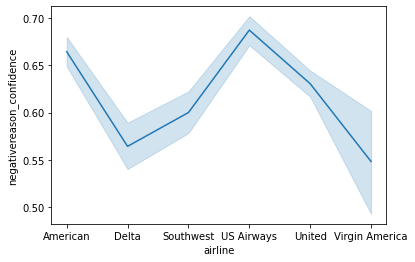

In [27]:
sb.lineplot(data=df, x="airline", y="negativereason_confidence")

## Users

In [37]:
df.name.value_counts()

JetBlueNews     63
kbosspotter     32
_mhertz         29
otisday         28
throthra        27
                ..
sklovek1        1 
nujoud          1 
hill43          1 
Traceyd14       1 
davegoldfarb    1 
Name: name, Length: 7701, dtype: int64

## Retweet count

In [38]:
df.retweet_count.value_counts()

0     13873
1     640  
2     66   
3     22   
4     17   
5     5    
7     3    
6     3    
22    2    
8     1    
32    1    
9     1    
31    1    
18    1    
15    1    
28    1    
44    1    
11    1    
Name: retweet_count, dtype: int64

## Tweet location

In [39]:
df.tweet_location.value_counts()

Boston, MA                        157
New York, NY                      156
Washington, DC                    150
New York                          127
USA                               126
                                 ... 
Fife, Dunfermline                 1  
Barrie | Ontario | Canada         1  
Bloomington, MN                   1  
Location: constantly changing!    1  
Marblehead, MA                    1  
Name: tweet_location, Length: 3081, dtype: int64

## User timezone

In [40]:
df.user_timezone.value_counts()

Eastern Time (US & Canada)    3744
Central Time (US & Canada)    1931
Pacific Time (US & Canada)    1208
Quito                         738 
Atlantic Time (Canada)        497 
                             ...  
Lisbon                        1   
EST                           1   
Saskatchewan                  1   
Pretoria                      1   
Tokyo                         1   
Name: user_timezone, Length: 85, dtype: int64

# Target variable

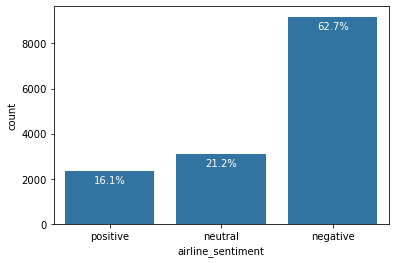

In [41]:
## Bar chart of Count & Proportion for target variable  
base_color = sb.color_palette()[0]
sb.countplot(data = df, x= 'airline_sentiment', color = base_color,
             order = ['positive', 'neutral', 'negative']);
#### add annotations
n_points = df.shape[0]
cat_counts = df['airline_sentiment'].value_counts()
locs, labels = plt.xticks()  # get the current tick locations and labels
#### loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    #### get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_points)

    #### print the annotation just below the top of the bar
    plt.text(loc, count-559, pct_string, ha='center', color='w')

# Customer Sentiment Comparison for each Airline

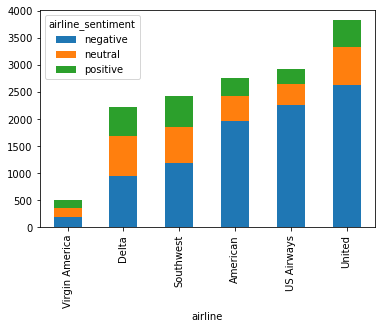

In [44]:
ct = pd.crosstab(df.airline, df.airline_sentiment)

ct.sort_values(by='negative', ascending=True).plot.bar(stacked=True)

In [46]:
data = pd.DataFrame(data=df, columns=['airline','airline_sentiment'])

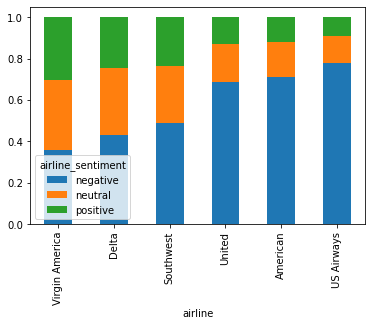

In [49]:
ct = pd.crosstab(df.airline, df.airline_sentiment, normalize='index')

ct.sort_values(by='negative', ascending=True).plot.bar(stacked=True)

/Users/rashidbaset/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


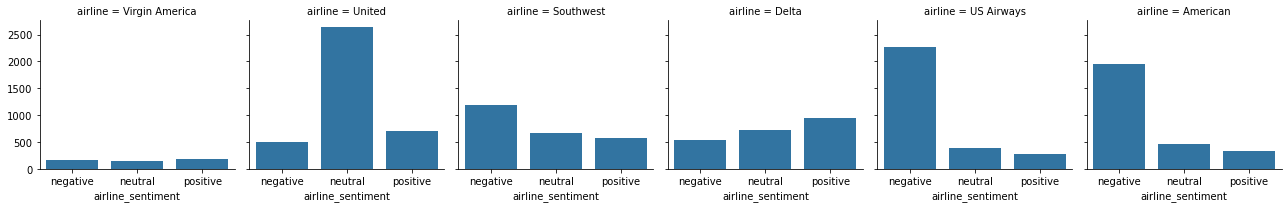

In [51]:
g = sb.FacetGrid(df, col="airline")
g.map(sb.countplot,"airline_sentiment")

# What are customers specifically unhappy about

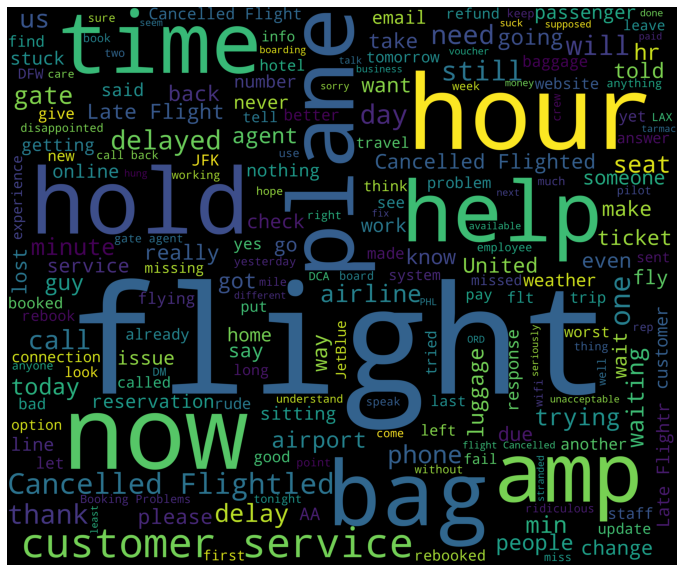

In [52]:
new_df=df[df['airline_sentiment']=='negative']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [53]:
words = ' '.join(df['negativereason'])

cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

TypeError: sequence item 0: expected str instance, float found

Text(0, 0.5, 'No. of Tweets')

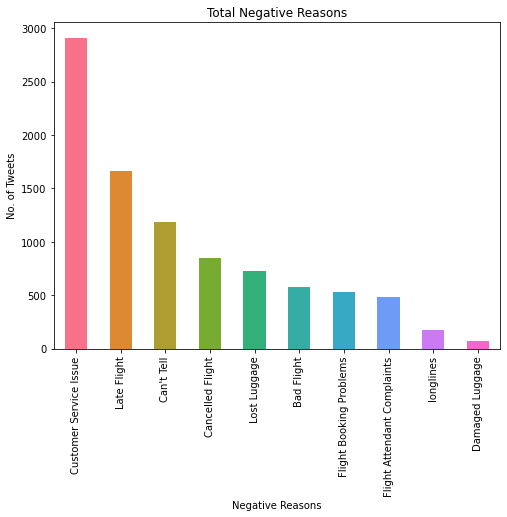

In [22]:
#Plotting all the negative reasons 
#color=sns.color_palette("husl", 10)
pd.Series(df["negativereason"]).value_counts().plot(kind = "bar",
                        color=color title = "Total Negative Reasons")
plt.xlabel('Negative Reasons', fontsize=10)
plt.ylabel('No. of Tweets', fontsize=10)

/Users/rashidbaset/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


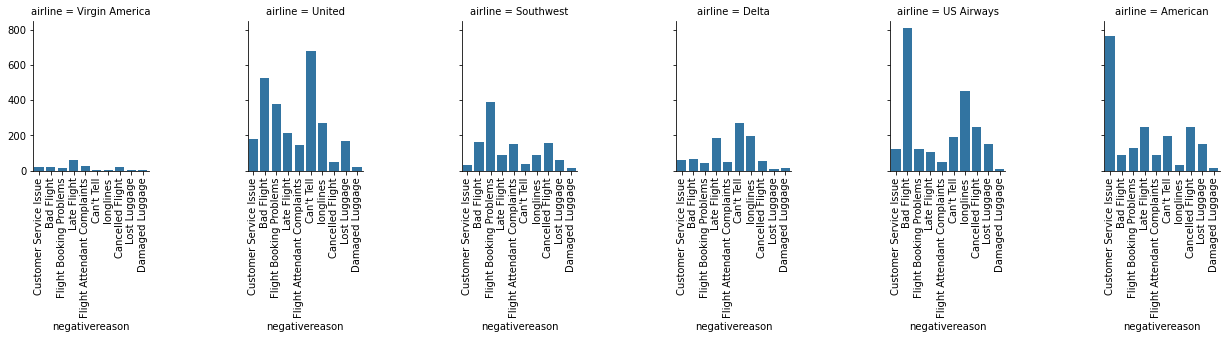

In [54]:
g = sb.FacetGrid(df, col="airline")
g1 = g.map(sb.countplot,"negativereason")
g1.set_xticklabels(rotation=90)

# Track sentiment over time

In [55]:
date = df.reset_index()
#convert the Date column to pandas datetime
date.tweet_created = pd.to_datetime(date.tweet_created)
#Reduce the dates in the date column to only the date and no time stamp using the 'dt.date' method
date.tweet_created = date.tweet_created.dt.date
date.tweet_created.head()
df = date
day_df = df.groupby(['tweet_created','airline','airline_sentiment']).size()
# day_df = day_df.reset_index()
day_df

tweet_created  airline         airline_sentiment
2015-02-17     Delta           negative             51 
                               neutral              63 
                               positive             47 
               Southwest       negative             162
                               neutral              69 
                                                    .. 
2015-02-24     United          neutral              88 
                               positive             55 
               Virgin America  negative             15 
                               neutral              15 
                               positive             19 
Length: 133, dtype: int64

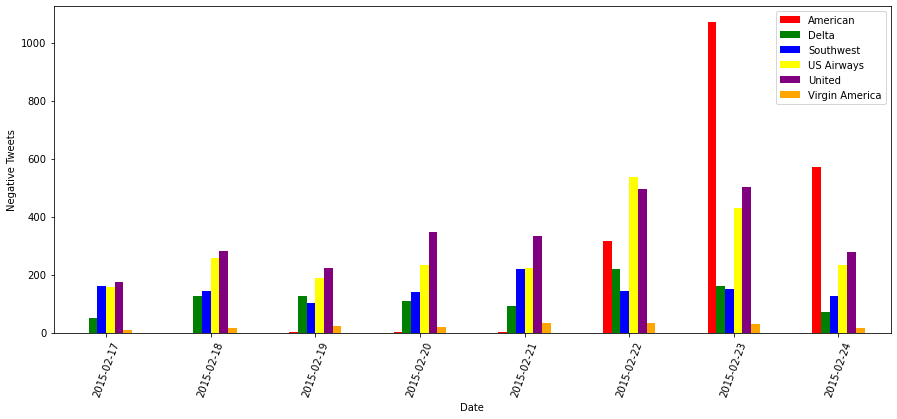

In [56]:
day_df = day_df.loc(axis=0)[:,:,'negative']

#groupby and plot data
ax2 = day_df.groupby(['tweet_created','airline']).sum().unstack().plot(kind = 'bar', color=['red', 'green', 'blue','yellow','purple','orange'], figsize = (15,6), rot = 70)
labels = ['American','Delta','Southwest','US Airways','United','Virgin America']
ax2.legend(labels = labels)
ax2.set_xlabel('Date')
ax2.set_ylabel('Negative Tweets')
plt.show()

# Determine if particular segments feel more strongly about airline. Can we determine key promoters and detractors?

# Track how a change in service affects how customers feel.